In [17]:
from PIL.ExifTags import TAGS
import pathlib
import csv
import glob
from pathlib import Path
from PIL import Image
import pandas as pd
import os
from datetime import time
from matplotlib import markers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib
import seaborn as sns
import glob
from seaborn import palettes
from seaborn.categorical import swarmplot
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from tqdm import tqdm
import json
from scipy.signal import detrend
from scipy.ndimage import gaussian_filter1d
from skimage.color import rgb2gray
import os
import re
import math
import matplotlib.ticker as tck
import argparse
import cv2
import skimage as ski
import random

Loading segmented cells

In [3]:
# Base path with .npy files 
path = 'E:/instru_projects/TimeSeriesAnalysis'

# Recursively loading
npy_files = glob.glob(path + "/**/*.npy", recursive=True)

Optional: removing earlier created binary contours .tif files (cleaning)

In [22]:
del_string = "contour"
contour_files = [file for file in Path(path).rglob("*.tif") if del_string in file.name]

for contour_file in contour_files:
    print(f"Deleting file: {contour_file}")
    contour_file.unlink()  

contour_files = [file for file in Path(path).rglob("*.tif") if del_string in file.name]

print(len(contour_files))



Deleting file: E:\instru_projects\TimeSeriesAnalysis\210821_2mgml_2500cellsml_ibidi\MCF10A\2mgml\120h\contour\10x_1_seg_contour.tif
Deleting file: E:\instru_projects\TimeSeriesAnalysis\210821_2mgml_2500cellsml_ibidi\MCF10A\2mgml\120h\contour\10x_2_seg_contour.tif
Deleting file: E:\instru_projects\TimeSeriesAnalysis\210821_2mgml_2500cellsml_ibidi\MCF10A\2mgml\120h\contour\10x_3_seg_contour.tif
Deleting file: E:\instru_projects\TimeSeriesAnalysis\210821_2mgml_2500cellsml_ibidi\MCF10A\2mgml\120h\contour\10x_4_seg_contour.tif
Deleting file: E:\instru_projects\TimeSeriesAnalysis\210821_2mgml_2500cellsml_ibidi\MCF10A\2mgml\120h\contour\10x_5_seg_contour.tif
Deleting file: E:\instru_projects\TimeSeriesAnalysis\210821_2mgml_2500cellsml_ibidi\MCF10A\2mgml\120h\contour\10x_6_seg_contour.tif
Deleting file: E:\instru_projects\TimeSeriesAnalysis\210821_2mgml_2500cellsml_ibidi\MCF10A\2mgml\120h\contour\10x_7_seg_contour.tif
Deleting file: E:\instru_projects\TimeSeriesAnalysis\210821_2mgml_2500cellsm

Generating binary contour .tifs from segmented npy arrays

In [25]:
#function for generating contour image
def contour(image):
    # Load the numpy array containing and unwrap it (contour_mask is a dictionary)
    contour_mask = np.load(image, allow_pickle=True).item()
    
    # Extract contours as binary mask from the "outlines" key, converting it to uint8
    contour, _ = cv2.findContours(contour_mask["outlines"].astype("uint8"), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Get the dimensions of the "outlines" array and create image
    height, width = contour_mask["outlines"].shape 
    binary_image = np.zeros((height, width), dtype=np.uint8)
    
    #draw the contours on the binary image, filling them in
    bin_image = cv2.drawContours(binary_image, contour, -1, (255), thickness=cv2.FILLED)
    return bin_image

#function for saving contour images in specific directory
def contour_saving(m,image):
  file_name = os.path.splitext(os.path.basename(m))[0]  # Get the filename without the extension
  contour_directory = os.path.dirname(m)+"\\contour\\"
  os.makedirs(contour_directory, exist_ok=True)

  # Save the contour image as a .tif file
  out_contour_img_path = os.path.join(contour_directory+file_name +'_contour.tif')
  cv2.imwrite(out_contour_img_path, image)  # Save contour image
  return print(f"Creating contour file: {out_contour_img_path}")

In [24]:
# Process each .npy file saved from cellpose
for i in npy_files:
  contour_image = contour(i)
  contour_saving(i,contour_image)


Creating contour file: E:/instru_projects/TimeSeriesAnalysis\210821_2mgml_2500cellsml_ibidi\MCF10A\2mgml\120h\contour\10x_1_seg_contour.tif
Creating contour file: E:/instru_projects/TimeSeriesAnalysis\210821_2mgml_2500cellsml_ibidi\MCF10A\2mgml\120h\contour\10x_2_seg_contour.tif
Creating contour file: E:/instru_projects/TimeSeriesAnalysis\210821_2mgml_2500cellsml_ibidi\MCF10A\2mgml\120h\contour\10x_3_seg_contour.tif
Creating contour file: E:/instru_projects/TimeSeriesAnalysis\210821_2mgml_2500cellsml_ibidi\MCF10A\2mgml\120h\contour\10x_4_seg_contour.tif
Creating contour file: E:/instru_projects/TimeSeriesAnalysis\210821_2mgml_2500cellsml_ibidi\MCF10A\2mgml\120h\contour\10x_5_seg_contour.tif
Creating contour file: E:/instru_projects/TimeSeriesAnalysis\210821_2mgml_2500cellsml_ibidi\MCF10A\2mgml\120h\contour\10x_6_seg_contour.tif
Creating contour file: E:/instru_projects/TimeSeriesAnalysis\210821_2mgml_2500cellsml_ibidi\MCF10A\2mgml\120h\contour\10x_7_seg_contour.tif
Creating contour fil

Random example of organoid in binary file

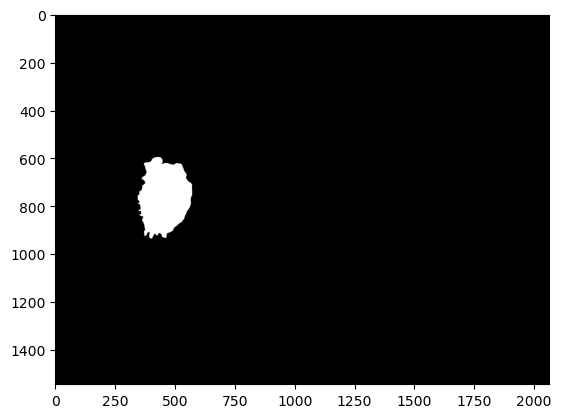

In [19]:
tiff_files = glob.glob(path+ "/*/*/*/*/contour/*.tif", recursive=True)
random_number = random.randint(0, len(tiff_files))
image = cv2.imread(tiff_files[random_number]) ## read the first image from the list
plt.imshow(image)

Mapping info

In [82]:
concentration_mapping = {
'2mgml': '1',
'3mM': '2',
'22mM': '3',
'40mM': '4'
}
material_mapping = {
'2mgml': '1',
'3mM': '2',
'22mM': '3',
'40mM': '4'
}
reverse_material_mapping = {
'2mgml':'collagen 2mg/ml',
'3mM':'IPN 2.5mM',
'22mM':'IPN 22mM',
'40mM':'IPN 40mM'
}
cell_mapping = {
'MCF10A': '1',
'MCF10A.DCIS.COM': '2',
'DCIS.COM':'2',
'MCF10AT': '3'
}

Check which images are missing segmented contours

In [35]:
path = 'E:/instru_projects/TimeSeriesAnalysis'
tif_files = glob.glob(path+ "/**/*.tif", recursive=True)

original_files = [file for file in tif_files if 'contour' not in file]    # Filter out files that contain 'contours' in their filenames

# Print the count of files that do not contain 'contours'
print(f"Number of original files: {len(original_files)}")
print(f"Number of contoured files: {len(contour_files)}")

missing_files = set(original_files)-set(contour_files)
for missing in missing_files: print(f"This file is missing contour: {missing}")



Number of original files: 2065
Number of contoured files: 1895
This file is missing contour: E:/instru_projects/TimeSeriesAnalysis\230719_2mgml_2500cellsml_squarewells\MCF10A.DCIS.COM\2mgml\192h\10x_3.tif
This file is missing contour: E:/instru_projects/TimeSeriesAnalysis\210821_2mgml_2500cellsml_ibidi\MCF10AT\2mgml\96h\10x_6.tif
This file is missing contour: E:/instru_projects/TimeSeriesAnalysis\230921_IPN15_2mgml_2500cellslm_squarewells\MCF10A.DCIS.COM\3mM\96h\10x_6.tif
This file is missing contour: E:/instru_projects/TimeSeriesAnalysis\210821_2mgml_2500cellsml_ibidi\MCF10AT\2mgml\120h\10x_2.tif
This file is missing contour: E:/instru_projects/TimeSeriesAnalysis\210821_2mgml_2500cellsml_ibidi\MCF10A.DCIS.COM\2mgml\120h\10x_5.tif
This file is missing contour: E:/instru_projects/TimeSeriesAnalysis\240828_IPN15_2mgml_2500cellsml_squarewells\MCF10A.DCIS.COM\22mM\24h\10x_image_005.tif
This file is missing contour: E:/instru_projects/TimeSeriesAnalysis\230921_IPN15_2mgml_2500cellslm_square

Visualizing specific location and quantifying the chosen features from npy arrays

Number segmented objects in the field of view: 54
Perimer of the segmented object (cell/organoid): 166.42640626430511
Perimer of the segmented object (cell/organoid): 228.30865609645844
Perimer of the segmented object (cell/organoid): 157.74011421203613
Perimer of the segmented object (cell/organoid): 195.19595801830292
Perimer of the segmented object (cell/organoid): 111.59797883033752
Perimer of the segmented object (cell/organoid): 184.61017155647278
Perimer of the segmented object (cell/organoid): 165.63960874080658
Perimer of the segmented object (cell/organoid): 158.87005698680878
Perimer of the segmented object (cell/organoid): 220.40916109085083
Perimer of the segmented object (cell/organoid): 114.87005758285522
Perimer of the segmented object (cell/organoid): 303.48022854328156
Perimer of the segmented object (cell/organoid): 169.05382239818573
Perimer of the segmented object (cell/organoid): 110.42640626430511
Perimer of the segmented object (cell/organoid): 220.6518018245697

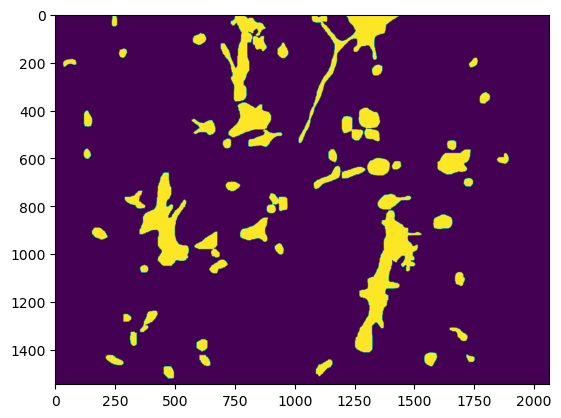

In [45]:

#Path to file for visualization
i='E:/instru_projects/TimeSeriesAnalysis/230719_2mgml_2500cellsml_squarewells/MCF10A.DCIS.COM/2mgml/144h/10x_4_seg.npy'

contour_mask = np.load(i, allow_pickle=True).item()
contours, hierarchy = cv2.findContours(contour_mask["outlines"].astype("uint8"), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Show a new binary image with the same dimensions and draw the filled contours
height, width = contour_mask["outlines"].shape 
binary_image = np.zeros((height, width), dtype=np.uint8)
image = cv2.drawContours(binary_image, contours, -1, (255), thickness=cv2.FILLED)
plt.imshow(image)

path1= i.replace("/","\\")
splitted = path1.split('\\')[-1]
#print(imagepath)
id = int(splitted.split('_')[-2])     
magnification = int(splitted.split('_')[-3].rstrip('x'))    
pixels = magnification//10

print(f"Number segmented objects in the field of view: {len(contours)}")

if len(contours) ==1:
    area = cv2.contourArea(contour)/(pixels**2)                     
    perimeter = cv2.arcLength(contour, closed=True)/pixels
    compactness = 4 * math.pi * area  / (perimeter**2)
    print(f"Perimer of the segmented object (cell/organoid): {perimeter}")
    print(f"Area of the segmented object: {area}")
    print(f"Compactness of the segmented object: {compactness}")
else:
    perimeters = []
    for contour in contours:    
        perimeter = cv2.arcLength(contour, closed=True)/pixels
        perimeters.append(perimeter)
        print(f"Perimer of the segmented object (cell/organoid): {perimeter}")
    
    average_perimeter = sum(perimeters) / len(perimeters)
    above = sum(1 for value in perimeters if value > 1000)
    below = sum(1 for value in perimeters if value < 1000)
    print(f"Average perimeter: {round(average_perimeter, 1)}")
    print(f"The count of large objects - classified as spheroids is: {above}")
    print(f"The count of small objects - classified as cells is: {below}")





IMAGE PROCESSING - extracting feature from all segmented npy files

In [26]:
#function for saving convex hull images
def convex_saving(m,image):
  file_name = os.path.splitext(os.path.basename(m))[0]  # Get the filename without the extension
  
  convex_directory = os.path.dirname(m)+"\\convex\\"
  os.makedirs(convex_directory, exist_ok=True)

  # Save the contour image as a .tif file
  out_convex_img_path = os.path.join(convex_directory+file_name +'_convex.tif')
  cv2.imwrite(out_convex_img_path, image)  # Save contour image

  # Print the saved file path for verification
  return print(f"Creating contour file: {out_convex_img_path}")

In [95]:
path = 'E:/instru_projects/TimeSeriesAnalysis'
tif_files = glob.glob(path+ "/**/contour/*.tif", recursive=True)
npy_files = glob.glob(path+ "/**/*.npy", recursive=True)

print(tif_files)
appended = []


start= 0
# Process each .npy file
for i in tif_files:
    firstimg = cv2.imread(i) #load the image for each path
    secondimg = cv2.cvtColor(firstimg, cv2.COLOR_BGR2GRAY) # changing from BGR order to RGB

    _, binary_image = cv2.threshold(secondimg, 128, 255, cv2.THRESH_BINARY) #applying binary thershold
    
    contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #find contours in binary image

    contours_info=[]
    base = os.path.splitext(os.path.basename(i))[0]
    splitted = i.split('\\')
    id = int(base.split('_')[-3])     
    magnification = int(base.split('_')[-4].rstrip('x'))    
    pixels = magnification//10
    incubation_time= int(splitted[4].rstrip('h'))   
    cell_line_name= splitted[2]          
    concentration= splitted[3]     
    experiment = splitted [1]
    wells = experiment.split('_')[-1]
    seeding = experiment.split('_')[-2].rstrip('cellsml')
    date = experiment.split('_')[0]

    if contours:
        start1= 0
        
        for count, contour in enumerate(contours):
            area = cv2.contourArea(contour)/(pixels**2)                     
            perimeter = cv2.arcLength(contour, closed=True)/pixels #perimeter for each contour
            compactness = 4 * math.pi * area  / (perimeter**2) #compactness (spheroid area/area of object with the identical perimeter)
            rect = cv2.minAreaRect(contour) #minimal rectangle
            
            width, height = rect[1] #extracting the tuple containing rectangular dimensions
            aspect_ratio = width / height

            convexhull = cv2.convexHull(contour)
            convexhull_perimeter = cv2.arcLength(convexhull, closed=True)/pixels #perimeter for each contour
            convexhull_area = cv2.contourArea(convexhull)/(pixels**2)  
            convexity_perimeter = convexhull_perimeter/perimeter
            convexity_area = convexhull_area/area
        
            info={}
            info = {
                "id": start+1,
                "id_in_image": start1+1,
                "path": path1,
                "well_type": wells,
                "seeding_density": seeding,
                "date": date,
                "cell_line":cell_line_name,
                "cell_line_no": int(cell_mapping.get(cell_line_name)),
                "incubation_time": incubation_time,
                "image_id": id,
                "magnification": magnification,
                "material": (reverse_material_mapping.get(concentration)),
                "concentration": int(concentration_mapping.get(concentration)),
                "area": area,
                "perimeter": perimeter,
                "convex hull area": convexhull_area,
                "convex hull perimeter": convexhull_perimeter,
                "convexity_perimeter": convexity_perimeter,
                "convexity_area": convexity_area,
                "compactness": compactness,
                "aspect_ratio": aspect_ratio
                }
            contours_info.append(pd.DataFrame([info]) )  #appending the info to the contours_info
            start+= 1 
            start1  += 1
    #   except IndexError:
    #        print(i)
    #   except ZeroDivisionError:
    #        print(i)
        convex_img = cv2.drawContours(secondimg, [convexhull], -1, 255, 2)  # Draw hull in white
        convex_saving(i,convex_img)
        cv2.imshow('Convex Hull', convex_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
        appended.append(pd.concat(contours_info, ignore_index=True))  # Concatenate contours' df and append to 'appended'
    else: print("No contours not found in image:", i)   


final_contours_info_1= pd.concat(appended, ignore_index=True)


['E:/instru_projects/TimeSeriesAnalysis\\210821_2mgml_2500cellsml_ibidi\\MCF10A\\2mgml\\120h\\contour\\10x_1_seg_contour.tif', 'E:/instru_projects/TimeSeriesAnalysis\\210821_2mgml_2500cellsml_ibidi\\MCF10A\\2mgml\\120h\\contour\\10x_2_seg_contour.tif', 'E:/instru_projects/TimeSeriesAnalysis\\210821_2mgml_2500cellsml_ibidi\\MCF10A\\2mgml\\120h\\contour\\10x_3_seg_contour.tif', 'E:/instru_projects/TimeSeriesAnalysis\\210821_2mgml_2500cellsml_ibidi\\MCF10A\\2mgml\\120h\\contour\\10x_4_seg_contour.tif', 'E:/instru_projects/TimeSeriesAnalysis\\210821_2mgml_2500cellsml_ibidi\\MCF10A\\2mgml\\120h\\contour\\10x_5_seg_contour.tif', 'E:/instru_projects/TimeSeriesAnalysis\\210821_2mgml_2500cellsml_ibidi\\MCF10A\\2mgml\\120h\\contour\\10x_6_seg_contour.tif', 'E:/instru_projects/TimeSeriesAnalysis\\210821_2mgml_2500cellsml_ibidi\\MCF10A\\2mgml\\120h\\contour\\10x_7_seg_contour.tif', 'E:/instru_projects/TimeSeriesAnalysis\\210821_2mgml_2500cellsml_ibidi\\MCF10A\\2mgml\\120h\\contour\\10x_8_seg_conto

DATA pre-PROCESSING

Filtering only files with contours

In [163]:
if final_contours_info_1.columns[0] == 'Unnamed: 0':
    final_contours_info = final_contours_info_1.drop(columns=['Unnamed: 0'])

final_contours_info_1.dropna(subset=['area'], inplace=True)


Normalizing numerical variables

In [164]:
norm = Normalizer() # Initialize the Normalizer
columns_to_normalize = ['area','perimeter', 'convexity_area', 'convexity_perimeter', 'aspect_ratio','convex hull area', 'compactness'] # selected variables to normalize
normalized = norm.fit_transform(final_contours_info_1[columns_to_normalize]) #normalizing
df_normalized = pd.DataFrame(normalized, columns=[col + '_N' for col in columns_to_normalize]) # df also with new columns
final_contours_info_with_normalized = pd.concat([final_contours_info_1, df_normalized], axis=1)


In [165]:
saving_path= 'C:/Users/srboval1/OneDrive - Aalto University/Instru/Datafiles'
final_contours_info_with_normalized.to_csv(saving_path+'/contours_exp1.csv')  


In [80]:
tif_files = glob.glob(path+ "/**/contour/*.tif", recursive=True)

for i in tif_files:
    base = os.path.splitext(os.path.basename(i))[0]
    splitted = i.split('\\')
    id = int(base.split('_')[-3])     
    magnification = int(base.split('_')[-4].rstrip('x'))    
    pixels = magnification//10
    incubation_time= int(splitted[4].rstrip('h'))   
    cell_line_name= splitted[2]          
    concentration= splitted[3]     
    experiment = splitted [1]
    wells = experiment.split('_')[-1]
    seeding = experiment.split('_')[-2].rstrip('cellsml')
    date = experiment.split('_')[0]


10 E:/instru_projects/TimeSeriesAnalysis\210821_2mgml_2500cellsml_ibidi\MCF10A\2mgml\120h\contour\10x_1_seg_contour.tif
10 E:/instru_projects/TimeSeriesAnalysis\210821_2mgml_2500cellsml_ibidi\MCF10A\2mgml\120h\contour\10x_2_seg_contour.tif
10 E:/instru_projects/TimeSeriesAnalysis\210821_2mgml_2500cellsml_ibidi\MCF10A\2mgml\120h\contour\10x_3_seg_contour.tif
10 E:/instru_projects/TimeSeriesAnalysis\210821_2mgml_2500cellsml_ibidi\MCF10A\2mgml\120h\contour\10x_4_seg_contour.tif
10 E:/instru_projects/TimeSeriesAnalysis\210821_2mgml_2500cellsml_ibidi\MCF10A\2mgml\120h\contour\10x_5_seg_contour.tif
10 E:/instru_projects/TimeSeriesAnalysis\210821_2mgml_2500cellsml_ibidi\MCF10A\2mgml\120h\contour\10x_6_seg_contour.tif
10 E:/instru_projects/TimeSeriesAnalysis\210821_2mgml_2500cellsml_ibidi\MCF10A\2mgml\120h\contour\10x_7_seg_contour.tif
10 E:/instru_projects/TimeSeriesAnalysis\210821_2mgml_2500cellsml_ibidi\MCF10A\2mgml\120h\contour\10x_8_seg_contour.tif
10 E:/instru_projects/TimeSeriesAnalysis

In [53]:
tif_files = glob.glob(path+ "/**/contour/*.tif", recursive=True)
print(tif_files)

['E:/instru_projects/TimeSeriesAnalysis\\210821_2mgml_2500cellsml_ibidi\\MCF10A\\2mgml\\120h\\contour\\10x_1_seg_contour.tif', 'E:/instru_projects/TimeSeriesAnalysis\\210821_2mgml_2500cellsml_ibidi\\MCF10A\\2mgml\\120h\\contour\\10x_2_seg_contour.tif', 'E:/instru_projects/TimeSeriesAnalysis\\210821_2mgml_2500cellsml_ibidi\\MCF10A\\2mgml\\120h\\contour\\10x_3_seg_contour.tif', 'E:/instru_projects/TimeSeriesAnalysis\\210821_2mgml_2500cellsml_ibidi\\MCF10A\\2mgml\\120h\\contour\\10x_4_seg_contour.tif', 'E:/instru_projects/TimeSeriesAnalysis\\210821_2mgml_2500cellsml_ibidi\\MCF10A\\2mgml\\120h\\contour\\10x_5_seg_contour.tif', 'E:/instru_projects/TimeSeriesAnalysis\\210821_2mgml_2500cellsml_ibidi\\MCF10A\\2mgml\\120h\\contour\\10x_6_seg_contour.tif', 'E:/instru_projects/TimeSeriesAnalysis\\210821_2mgml_2500cellsml_ibidi\\MCF10A\\2mgml\\120h\\contour\\10x_7_seg_contour.tif', 'E:/instru_projects/TimeSeriesAnalysis\\210821_2mgml_2500cellsml_ibidi\\MCF10A\\2mgml\\120h\\contour\\10x_8_seg_conto